# Competición: predicción precios ordenadores (TC: Kaggle)

## Importación librerías

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import *

import re

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)

from EDA_function_tools import *
from toolbox_DS import *


## Carga datos y primer vistazo

In [2]:
df = pd.read_csv('./data/train.csv', index_col=0)
df.head(8)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
id,,,,,,,,,,,,,
268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
867,376,Asus,ZenBook Flip,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26kg,1099.00
1136,60,Asus,X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,Linux,2kg,415.00
609,1157,MSI,GP62M 7RDX,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.4kg,1142.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 99.8+ KB


In [4]:
describe_df(df).T

,DATE_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
laptop_ID,int64,0.0,912,100.0
Company,object,0.0,19,2.08
Product,object,0.0,475,52.08
TypeName,object,0.0,6,0.66
Inches,float64,0.0,15,1.64
ScreenResolution,object,0.0,35,3.84
Cpu,object,0.0,104,11.4
Ram,object,0.0,8,0.88
Memory,object,0.0,36,3.95
Gpu,object,0.0,91,9.98


In [5]:
tipifica_variables(df,10,30)

,nombre_variable,tipo_sugerido
0,laptop_ID,Numérica Continua
1,Company,Object
2,Product,Object
3,TypeName,Categórica
4,Inches,Numérica Discreta
5,ScreenResolution,Object
6,Cpu,Object
7,Ram,Categórica
8,Memory,Object
9,Gpu,Object


| nombre_variable  | definición                        | tipo_sugerido       | DATE_TYPE | MISSINGS (%) | UNIQUE_VALUES | CARDIN (%) |
|------------------|-----------------------------------|---------------------|-----------|--------------|---------------|------------|
| laptop_ID        | ID del portátil                   | Numérica Continua   | int64     | 0.0          | 912           | 100.0      |
| Company          | Empresa                           | Object              | object    | 0.0          | 19            | 2.08       |
| Product          | Producto                          | Object              | object    | 0.0          | 475           | 52.08      |
| TypeName         | Tipo de nombre                    | Categórica          | object    | 0.0          | 6             | 0.66       |
| Inches           | Pulgadas                          | Numérica Discreta   | float64   | 0.0          | 15            | 1.64       |
| ScreenResolution | Resolución de pantalla            | Object              | object    | 0.0          | 35            | 3.84       |
| Cpu              | Procesador                        | Object              | object    | 0.0          | 104           | 11.4       |
| Ram              | Memoria RAM                       | Categórica          | object    | 0.0          | 8             | 0.88       |
| Memory           | Memoria interna                   | Object              | object    | 0.0          | 36            | 3.95       |
| Gpu              | Tarjeta gráfica                   | Object              | object    | 0.0          | 91            | 9.98       |
| OpSys            | Sistema operativo                 | Categórica          | object    | 0.0          | 9             | 0.99       |
| Weight           | Peso                              | Object              | object    | 0.0          | 158           | 17.32      |
| Price_euros      | Precio en euros                   | Numérica Continua   | float64   | 0.0          | 614           | 67.32      |


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


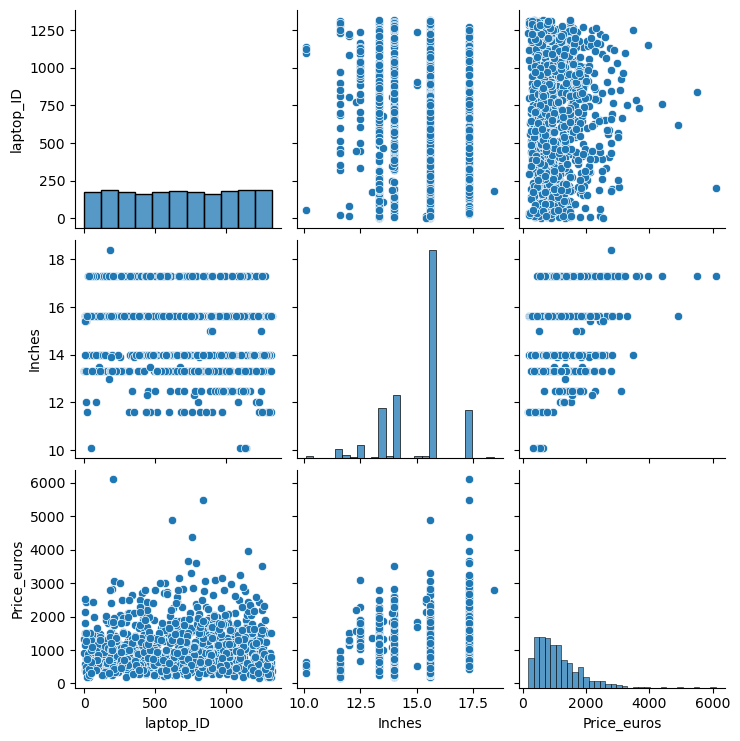

In [6]:
sns.pairplot(df)

## Limpieza y transformación de variables

### Duplicados y nulos

#### Duplicados

In [7]:
df.duplicated().sum()

0

No hay duplicados

#### Nulos

In [8]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

No hay nulos

In [9]:
features= df.columns.tolist()

for feature in features:
    unicos = df[feature].nunique()
    tipo = df[feature].dtype
    valores = df[feature].value_counts(normalize=True)
    
    print(f'{feature}: tipo:{tipo} valores_unicos:{unicos}')
    pprint(f'{valores}')
    print('*'*25)

laptop_ID: tipo:int64 valores_unicos:912
('laptop_ID\n'
 '1002    0.001096\n'
 '945     0.001096\n'
 '374     0.001096\n'
 '158     0.001096\n'
 '960     0.001096\n'
 '          ...   \n'
 '691     0.001096\n'
 '632     0.001096\n'
 '1246    0.001096\n'
 '1240    0.001096\n'
 '1313    0.001096\n'
 'Name: proportion, Length: 912, dtype: float64')
*************************
Company: tipo:object valores_unicos:19
('Company\n'
 'Lenovo       0.228070\n'
 'Dell         0.226974\n'
 'HP           0.207237\n'
 'Asus         0.118421\n'
 'Acer         0.082237\n'
 'Toshiba      0.040570\n'
 'MSI          0.037281\n'
 'Apple        0.018640\n'
 'Mediacom     0.007675\n'
 'Razer        0.006579\n'
 'Samsung      0.006579\n'
 'Fujitsu      0.003289\n'
 'Microsoft    0.003289\n'
 'Vero         0.003289\n'
 'Xiaomi       0.003289\n'
 'Google       0.002193\n'
 'Chuwi        0.002193\n'
 'LG           0.001096\n'
 'Huawei       0.001096\n'
 'Name: proportion, dtype: float64')
************************

Primeras conclusiones:
- ~~Eliminar la columna laptop_ID~~
- ~~Eliminar el nombre del producto Product~~
- ~~ Modificar la columna ScreenResolution sacando solo la resolución de primeras~~
    - ~~Habría que valorar también sacar: HD, pantalla táctil, IPS Panel, 4K, ultra~~
- ~~Modificar columna Cpu sacando diferentes componentes como:~~
    - ~~Inte Core~~
    - ~~Nombre~~
    - ~~Velocidad en ghz~~
- ~~Eliminar de la columna Ram las letras GB~~
- ~~La feature Memory no sé muy bien cómo afrontarla... pero algo hay que hacer con ella~~
- ~~Modificar la feature Gpu sacando por un lado el nombre y por otro el modelo? o dejrala como está de momento~~
- ~~Eliminar de la variable Weight las letras kg~~

Supuestametne habría que hacer primero la modificación en el train_set y con los valores de éste la modificación en el test_set, pero como es el set de train, lo hago todo ahora y luego hago la división.  
Esto mismo se hará al set específico de test.

### Tratamiento de variables

In [10]:
# Hago copia del df y elimino las dos columnas comantadas 'laptot_ID' y 'Product'
df_copy = df.copy()
df_copy = df_copy.drop(['laptop_ID','Product'],axis = 1)

#### Variable Ram

In [11]:
# Elimino las letras 'GB' de la varialbe 'Ram'
df_copy['Ram'] = df_copy['Ram'].str.replace('GB','')

#### Variable Weight

In [12]:
# Elimino las letras 'kg' de la variable 'Weight'
df_copy['Weight'] = df_copy['Weight'].str.replace('kg','')

In [13]:
# Reviso los cambios realizados
df_copy.head(8)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
id,,,,,,,,,,,
268,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00
347,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2,449.00
353,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.2,1460.00
578,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99
42,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37
867,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,1099.00
1136,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2,415.00
609,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.4,1142.80


In [14]:
# Veo si se han modificado los tipos de las variables 'Ram' y 'Weight'
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   TypeName          912 non-null    object 
 2   Inches            912 non-null    float64
 3   ScreenResolution  912 non-null    object 
 4   Cpu               912 non-null    object 
 5   Ram               912 non-null    object 
 6   Memory            912 non-null    object 
 7   Gpu               912 non-null    object 
 8   OpSys             912 non-null    object 
 9   Weight            912 non-null    object 
 10  Price_euros       912 non-null    float64
dtypes: float64(2), object(9)
memory usage: 85.5+ KB


In [15]:
# No se han cmabiado. Compruebo para 'Ram'
df_copy['Ram'].value_counts(normalize=True)

Ram
8     0.475877
4     0.300439
16    0.137061
6     0.035088
2     0.017544
12    0.016447
32    0.015351
24    0.002193
Name: proportion, dtype: float64

In [16]:
# Compruebo para 'weight'
df_copy['Weight'].value_counts(normalize=True)

Weight
2.2     0.094298
2.1     0.043860
2.3     0.038377
2.4     0.033991
2       0.032895
          ...   
4.0     0.001096
0.98    0.001096
3.6     0.001096
2.99    0.001096
1.79    0.001096
Name: proportion, Length: 158, dtype: float64

In [18]:
# Cambio el tipo de varialbe a 'float' de 'Ram' y 'Weight'
df_copy['Ram'] = df_copy['Ram'].astype('int')
df_copy['Weight'] = df_copy['Weight'].astype('float')

In [19]:
# Compruebo el cambio
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   TypeName          912 non-null    object 
 2   Inches            912 non-null    float64
 3   ScreenResolution  912 non-null    object 
 4   Cpu               912 non-null    object 
 5   Ram               912 non-null    int32  
 6   Memory            912 non-null    object 
 7   Gpu               912 non-null    object 
 8   OpSys             912 non-null    object 
 9   Weight            912 non-null    float64
 10  Price_euros       912 non-null    float64
dtypes: float64(3), int32(1), object(7)
memory usage: 81.9+ KB


In [57]:
df_copy.groupby(['Ram'])['Price_euros'].median()

Ram
2      219.90
4      491.50
6      578.00
8     1099.00
12    1099.00
16    1877.00
24    1825.50
32    3110.13
Name: Price_euros, dtype: float64

#### Variable ScreenResolution

In [20]:
# Vamos a valorar la variable 'ScreenResolution	'
df_copy['ScreenResolution'].value_counts(normalize=True)

ScreenResolution
Full HD 1920x1080                                0.379386
1366x768                                         0.228070
IPS Panel Full HD 1920x1080                      0.178728
IPS Panel Full HD / Touchscreen 1920x1080        0.040570
Full HD / Touchscreen 1920x1080                  0.035088
Touchscreen 1366x768                             0.016447
1600x900                                         0.012061
IPS Panel 4K Ultra HD 3840x2160                  0.010965
4K Ultra HD / Touchscreen 3840x2160              0.008772
Quad HD+ / Touchscreen 3200x1800                 0.008772
IPS Panel 4K Ultra HD / Touchscreen 3840x2160    0.008772
IPS Panel Retina Display 2304x1440               0.006579
IPS Panel Retina Display 2560x1600               0.005482
IPS Panel 1366x768                               0.005482
4K Ultra HD 3840x2160                            0.005482
IPS Panel Touchscreen 1920x1200                  0.004386
Touchscreen 2560x1440                            0.0043

In [21]:
# Obtengo la resolución en valores 
resolution = []
for resolucion in df_copy['ScreenResolution']:
    x = re.findall('\d\d\d\dx\d\d\d?\d',resolucion)
    resolution.append(x)
print(resolution)

[['1366x768'], ['1366x768'], ['1920x1080'], ['3840x2160'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['1920x1080'], ['1366x768'], ['3840x2160'], ['1920x1080'], ['1920x1200'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['3840x2160'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['1920x1080'], ['1366x768'], ['1366x768'], ['1366x768'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['1366x768'], ['1920x1080'], ['2880x1800'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1366x768'], ['1366x768'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1366x768'], ['1366x768'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1920x1080'], ['1366x768'],

In [22]:
# Obtengo una lista única (dado que tenía una lista de listas)
lista_resolution = []
for n in range(0, len(resolution)):
    valor = resolution[n][0]
    lista_resolution.append(valor)
print(lista_resolution)


['1366x768', '1366x768', '1920x1080', '3840x2160', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1366x768', '1920x1080', '1366x768', '1920x1080', '1366x768', '1920x1080', '1920x1080', '1366x768', '3840x2160', '1920x1080', '1920x1200', '1920x1080', '1366x768', '1920x1080', '3840x2160', '1920x1080', '1366x768', '1920x1080', '1366x768', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1366x768', '1920x1080', '1920x1080', '1366x768', '1366x768', '1366x768', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1366x768', '1920x1080', '1366x768', '1920x1080', '2880x1800', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1366x768', '1366x768', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1366x768', '1366x768', '1920x1080', '1920x1080', '1920x1080', '1920x1080', '1366x768', '1366x768', '1366x768', '1920x1080', '1366x768', '1920x1080', '3840x2160', '1366x768', '1920x1080', '1920x1080', '1920x1080', '1366x768

In [23]:
# Añado nueva variable con la información
df_copy['Resolution'] = lista_resolution

In [24]:
# Compruebo
df_copy.head(8)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution
id,,,,,,,,,,,,
268,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00,1366x768
347,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,449.00,1366x768
353,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,1460.00,1920x1080
578,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,3840x2160
42,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37,1920x1080
867,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,1099.00,1920x1080
1136,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,415.00,1920x1080
609,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,1142.80,1920x1080


In [25]:
# Reviso cómo queda la nueva variable
df_copy['Resolution'].value_counts(normalize=True)

Resolution
1920x1080    0.638158
1366x768     0.251096
3840x2160    0.037281
3200x1800    0.016447
2560x1440    0.015351
1600x900     0.012061
2304x1440    0.006579
1920x1200    0.005482
2560x1600    0.005482
2880x1800    0.003289
2256x1504    0.003289
1440x900     0.002193
2400x1600    0.002193
2160x1440    0.001096
Name: proportion, dtype: float64

In [26]:
df_copy.groupby('Resolution')['ScreenResolution'].value_counts()

Resolution  ScreenResolution                             
1366x768    1366x768                                         208
            Touchscreen 1366x768                              15
            IPS Panel 1366x768                                 5
            IPS Panel Touchscreen 1366x768                     1
1440x900    1440x900                                           2
1600x900    1600x900                                          11
1920x1080   Full HD 1920x1080                                346
            IPS Panel Full HD 1920x1080                      163
            IPS Panel Full HD / Touchscreen 1920x1080         37
            Full HD / Touchscreen 1920x1080                   32
            1920x1080                                          3
            Touchscreen / Full HD 1920x1080                    1
1920x1200   IPS Panel Touchscreen 1920x1200                    4
            IPS Panel Full HD 1920x1200                        1
2160x1440   IPS Panel Full HD 21

In [27]:
# Comparo como queda la nueva variable en función de la varaible target (precio)
df_copy.groupby('Resolution')['Price_euros'].agg(['median','mean'])

Resolution
1366x768      469.00
1440x900     1028.82
1600x900      639.90
1920x1080    1089.00
1920x1200     479.00
2160x1440    1349.00
2256x1504    1340.00
2304x1440    1270.70
2400x1600    1879.00
2560x1440    2310.50
2560x1600    1803.60
2880x1800    2439.97
3200x1800    1499.00
3840x2160    2398.00
Name: Price_euros, dtype: float64

In [60]:
# Comparo entre mediana y media
df_copy.groupby('Resolution')['Price_euros'].agg(['median','mean']).describe()

,median,mean
count,14.000000,14.000000
mean,1428.249286,1441.275048
std,670.687569,660.179289
min,469.000000,451.654000
25%,1043.865000,1073.160653
50%,1344.500000,1373.975000
75%,1860.150000,1842.287000
max,2439.970000,2558.836471


In [63]:
# Creo una discretización en base a cuantía económica. Lo hago cada 300€ a ver si así se afina el modelo
df_copy['Resolution_median'] = df_copy.groupby('Resolution')['Price_euros'].transform('median')

categorias = [(df_copy['Resolution_median'])< 600,
              (df_copy['Resolution_median'] > 599) & (df_copy['Resolution_median']< 900),
              (df_copy['Resolution_median'] > 899) & (df_copy['Resolution_median']< 1200),
              (df_copy['Resolution_median'] > 1199) & (df_copy['Resolution_median']< 1500),
              (df_copy['Resolution_median'] > 1499) & (df_copy['Resolution_median']< 1800),
              (df_copy['Resolution_median'] > 1799) & (df_copy['Resolution_median']< 2100),
              (df_copy['Resolution_median'] > 2099) & (df_copy['Resolution_median']< 2400),
              (df_copy['Resolution_median']> 2399)
              ]

orden= [0,1,2,3,4,5,6,7]

df_copy['Resolution_disc'] = np.select(categorias,orden)
df_copy['Resolution_disc'].describe()

count    912.000000
mean       1.752193
std        1.414212
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        7.000000
Name: Resolution_disc, dtype: float64

In [64]:
# Compruebo como queda y con esto la idea es hacer un diccionario para pasarselo a test dado que este dataset no tiene la variable price
df_copy.groupby('Resolution')['Resolution_disc'].mean()

Resolution
1366x768     0.0
1440x900     2.0
1600x900     1.0
1920x1080    2.0
1920x1200    0.0
2160x1440    3.0
2256x1504    3.0
2304x1440    3.0
2400x1600    5.0
2560x1440    6.0
2560x1600    5.0
2880x1800    7.0
3200x1800    3.0
3840x2160    6.0
Name: Resolution_disc, dtype: float64

In [70]:
temp = df_copy.groupby('Resolution')['Resolution_disc'].mean()
dicc_resolution = {}
for i,j in enumerate(temp):
    clave = temp.index[i]
    valor = j
    dicc_resolution[clave] = valor
dicc_resolution

{'1366x768': 0.0,
 '1440x900': 2.0,
 '1600x900': 1.0,
 '1920x1080': 2.0,
 '1920x1200': 0.0,
 '2160x1440': 3.0,
 '2256x1504': 3.0,
 '2304x1440': 3.0,
 '2400x1600': 5.0,
 '2560x1440': 6.0,
 '2560x1600': 5.0,
 '2880x1800': 7.0,
 '3200x1800': 3.0,
 '3840x2160': 6.0}

In [73]:
tipos_pantalla =[]
screen_types = {'Pantalla':['4K Ultra HD', 'Full HD', 'Quad HD+', 'Retina Display','Touchscreen']}

for n in df_copy['ScreenResolution']:
    found = False  
    for p in screen_types['Pantalla']:
        if p in n:
            tipos_pantalla.append(p)
            found = True
            break  
    if not found:
        tipos_pantalla.append('Full HD')

print(tipos_pantalla)


['Full HD', 'Full HD', 'Full HD', '4K Ultra HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', '4K Ultra HD', 'Full HD', 'Touchscreen', 'Full HD', 'Full HD', 'Full HD', '4K Ultra HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Touchscreen', 'Full HD', 'Full HD', 'Full HD', 'Retina Display', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', '4K Ultra HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Touchscreen', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full HD', 'Full H

In [74]:
df_copy['Pantalla'] = tipos_pantalla

In [75]:
df_copy.head(8)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type,Resolution_median,Resolution_disc
id,,,,,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,...,Full HD,Intel,Core i7,7500U,2.7,AMD,Radeon R7 M445,Dedicated,469.0,0
347,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,...,Full HD,Intel,Pentium,Quad,1.1,Intel,HD Graphics 505,Unknown,469.0,0
353,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,...,Full HD,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Unknown,1089.0,2
578,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,...,4K Ultra HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1070,Dedicated,2398.0,6
42,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,...,Full HD,Intel,Core i5,6300U,2.4,Intel,HD Graphics 520,Unknown,1089.0,2
867,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,...,Full HD,Intel,Core i7,7500U,2.7,Nvidia,GeForce GT 940MX,Dedicated,1089.0,2
1136,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,...,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown,1089.0,2
609,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,...,Full HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1050,Dedicated,1089.0,2


In [76]:
df_copy['Pantalla'].value_counts(normalize=True)

Pantalla
Full HD           0.893640
4K Ultra HD       0.037281
Touchscreen       0.036184
Quad HD+          0.017544
Retina Display    0.015351
Name: proportion, dtype: float64

In [77]:
df_copy.groupby('Pantalla')['ScreenResolution'].value_counts(normalize=True)

Pantalla        ScreenResolution                             
4K Ultra HD     IPS Panel 4K Ultra HD 3840x2160                  0.294118
                4K Ultra HD / Touchscreen 3840x2160              0.235294
                IPS Panel 4K Ultra HD / Touchscreen 3840x2160    0.235294
                4K Ultra HD 3840x2160                            0.147059
                IPS Panel Touchscreen / 4K Ultra HD 3840x2160    0.058824
                Touchscreen / 4K Ultra HD 3840x2160              0.029412
Full HD         Full HD 1920x1080                                0.424540
                1366x768                                         0.255215
                IPS Panel Full HD 1920x1080                      0.200000
                IPS Panel Full HD / Touchscreen 1920x1080        0.045399
                Full HD / Touchscreen 1920x1080                  0.039264
                1600x900                                         0.013497
                IPS Panel 1366x768                

In [80]:
df_copy.groupby('Pantalla')['Price_euros'].agg(['median','mean'])

,median,mean
Pantalla,,
4K Ultra HD,2398.000,2558.836471
Full HD,899.000,1031.422822
Quad HD+,1499.000,1507.483750
Retina Display,1514.275,1675.537857
Touchscreen,615.000,1073.356061


In [79]:
df_copy.groupby('Pantalla')['Price_euros'].agg(['median','mean']).describe()

,median,mean
count,5.000000,5.000000
mean,1385.055000,1569.327392
std,686.471596,618.377394
min,615.000000,1031.422822
25%,899.000000,1073.356061
50%,1499.000000,1507.483750
75%,1514.275000,1675.537857
max,2398.000000,2558.836471


In [85]:
temp = df_copy.groupby('Pantalla')['Price_euros'].agg('median').sort_values()
dicc_pantalla = {}
for i,j in enumerate(temp):
    clave = temp.index[i]
    valor = i
    dicc_pantalla[clave]= valor
dicc_pantalla

{'Touchscreen': 0,
 'Full HD': 1,
 'Quad HD+': 2,
 'Retina Display': 3,
 '4K Ultra HD': 4}

#### Variable Cpu

In [34]:
# Variable 'Cpu'
df_copy['Cpu'].value_counts(normalize=True)[0:40]


Cpu
Intel Core i5 7200U 2.5GHz              0.155702
Intel Core i7 7700HQ 2.8GHz             0.111842
Intel Core i7 7500U 2.7GHz              0.096491
Intel Core i5 8250U 1.6GHz              0.059211
Intel Core i5 6200U 2.3GHz              0.055921
Intel Core i3 6006U 2GHz                0.051535
Intel Core i7 8550U 1.8GHz              0.048246
Intel Core i7 6500U 2.5GHz              0.037281
Intel Core i3 7100U 2.4GHz              0.031798
Intel Core i7 6700HQ 2.6GHz             0.030702
Intel Celeron Dual Core N3350 1.1GHz    0.024123
Intel Celeron Dual Core N3060 1.6GHz    0.021930
Intel Core i5 7300HQ 2.5GHz             0.020833
Intel Pentium Quad Core N4200 1.1GHz    0.013158
Intel Core i7 6600U 2.6GHz              0.013158
Intel Pentium Quad Core N3710 1.6GHz    0.010965
Intel Core i3 6006U 2.0GHz              0.010965
Intel Core i7 7600U 2.8GHz              0.009868
Intel Core i5 6300U 2.4GHz              0.009868
Intel Celeron Dual Core N3050 1.6GHz    0.008772
Intel Core i5 73

In [35]:
# Función para extraer el fabricante (brand)
def extract_brand(cpu):
    return cpu.split()[0]

# Función para extraer la familia (family)
def extract_family(cpu):
    parts = cpu.split()
    if parts[1] == 'Core':
        return parts[1] + ' ' + parts[2]
    else:
        return parts[1]

# Función para extraer el modelo
def extract_model(cpu):
    parts = cpu.split()
    if parts[1] == 'Core':
        return parts[3]
    else:
        return parts[2]

# Función para extraer la velocidad de reloj (clock speed)
def extract_clock_speed(cpu):
    return float(cpu.split()[-1].replace('GHz', ''))

# Aplicar las funciones para crear nuevas columnas
df_copy['Brand'] = df_copy['Cpu'].apply(extract_brand)
df_copy['Family'] = df_copy['Cpu'].apply(extract_family)
df_copy['Model'] = df_copy['Cpu'].apply(extract_model)
df_copy['Clock Speed (GHz)'] = df_copy['Cpu'].apply(extract_clock_speed)

In [36]:
df_copy.head(8)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz)
id,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00,1366x768,Full HD,Intel,Core i7,7500U,2.7
347,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,449.00,1366x768,Full HD,Intel,Pentium,Quad,1.1
353,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,1460.00,1920x1080,Full HD,Intel,Core i5,6200U,2.3
578,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,3840x2160,4K Ultra HD,Intel,Core i7,7700HQ,2.8
42,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37,1920x1080,Full HD,Intel,Core i5,6300U,2.4
867,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,1099.00,1920x1080,Full HD,Intel,Core i7,7500U,2.7
1136,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,415.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0
609,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,1142.80,1920x1080,Full HD,Intel,Core i7,7700HQ,2.8


In [37]:
df_copy.groupby('Brand')['Price_euros'].median()

Brand
AMD      450.0
Intel    977.0
Name: Price_euros, dtype: float64

In [87]:
df_copy.groupby('Family')['Price_euros'].agg('median').sort_values()

Family
Atom           252.000
Celeron        298.500
E-Series       299.000
Pentium        393.995
A6-Series      398.500
A8-Series      418.000
A9-Series      451.000
Core i3        498.900
A12-Series     573.285
A10-Series     575.000
FX             849.000
Core i5        943.000
Core M        1165.000
Core i7       1458.000
Ryzen         1549.000
Xeon          3722.000
Name: Price_euros, dtype: float64

In [88]:
df_copy.groupby('Family')['Price_euros'].agg(['median','mean']).describe()

,median,mean
count,16.000000,16.000000
mean,865.261250,890.729810
std,864.455126,834.951512
min,252.000000,300.141429
25%,397.373750,413.203750
50%,536.092500,569.411717
75%,998.500000,1077.900259
max,3722.000000,3584.000000


In [89]:
df_copy['Family_median'] = df_copy.groupby('Family')['Price_euros'].transform('median')
df_copy['Family_median'].value_counts()

Family_median
1458.000    351
943.000     305
498.900      99
298.500      62
393.995      26
1165.000     13
252.000      12
451.000      11
299.000       7
573.285       6
398.500       6
3722.000      4
575.000       3
1549.000      3
849.000       2
418.000       2
Name: count, dtype: int64

In [90]:
# Vamos a discretizar en base a la mediana (dudo si hacer las mismas categorías en todas o cada una la suya. Opto por cada variable la que considere más apropiada)

categorias = [(df_copy['Family_median'] < 400),
              (df_copy['Family_median'] > 399) & (df_copy['Family_median'] < 500),
              (df_copy['Family_median'] > 499) & (df_copy['Family_median'] < 1000),
              (df_copy['Family_median'] > 999) & (df_copy['Family_median'] < 1600),
              (df_copy['Family_median'] > 1599),
]

orden = [0,1,2,3,4]

df_copy['Family_disc']=np.select(categorias,orden)
df_copy['Family_disc'].value_counts()

Family_disc
3    367
2    316
0    113
1    112
4      4
Name: count, dtype: int64

In [97]:
temp = df_copy.groupby('Family')['Family_disc'].agg('median').sort_values()
dicc_family_procesador = {}
for i,j in enumerate(temp):
    clave = temp.index[i]
    valor = j
    dicc_family_procesador[clave]= valor
dicc_family_procesador

{'A6-Series': 0.0,
 'Atom': 0.0,
 'Celeron': 0.0,
 'E-Series': 0.0,
 'Pentium': 0.0,
 'A8-Series': 1.0,
 'A9-Series': 1.0,
 'Core i3': 1.0,
 'A10-Series': 2.0,
 'A12-Series': 2.0,
 'Core i5': 2.0,
 'FX': 2.0,
 'Core M': 3.0,
 'Core i7': 3.0,
 'Ryzen': 3.0,
 'Xeon': 4.0}

In [39]:
df_copy.groupby('Model')['Price_euros'].median()

Model
1.1GHz      1231.50
1.2GHz      1222.00
1.3GHz      1510.00
1.6GHz       959.00
1.8GHz      1028.82
             ...   
m3          1262.40
m3-7Y30      989.00
x5-Z8300     244.99
x5-Z8350     248.90
x5-Z8550     514.00
Name: Price_euros, Length: 78, dtype: float64

In [92]:
df_copy.groupby('Clock Speed (GHz)')['Price_euros'].value_counts(normalize=True)

Clock Speed (GHz)  Price_euros
0.9                669.00         0.500
                   729.00         0.500
1.0                603.00         1.000
1.1                299.00         0.075
                   344.00         0.050
                                  ...  
3.2                1695.00        1.000
3.6                429.00         0.250
                   549.00         0.250
                   597.57         0.250
                   899.00         0.250
Name: proportion, Length: 805, dtype: float64

In [93]:
df_copy.groupby('Clock Speed (GHz)')['Price_euros'].agg(['median','mean'])

,median,mean
Clock Speed (GHz),,
0.90,699.000,699.000000
1.00,603.000,603.000000
1.10,346.000,413.440000
1.20,1339.000,1571.940000
1.30,1774.000,1736.516667
1.44,249.000,330.260000
1.50,243.495,295.373750
1.60,675.000,661.680306
1.80,1091.500,1142.210417


In [51]:
df_copy.loc[(df_copy['Clock Speed (GHz)'] > 1.91) & (df_copy['Clock Speed (GHz)'] < 2.21) ]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type
id,,,,,,,,,,,,,,,,,,,,
1136,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,415.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown
36,Toshiba,Notebook,14.0,1366x768,Intel Pentium Dual Core 4405U 2.1GHz,4,128GB SSD,Intel HD Graphics 510,Windows 10,1.75,499.00,1366x768,Full HD,Intel,Pentium,Dual,2.1,Intel,HD Graphics 510,Unknown
829,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.00,389.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 620,Unknown
707,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18,614.00,1366x768,Full HD,Intel,Core i3,6006U,2.0,AMD,Radeon R5 M420X,Dedicated
1047,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,418.64,1366x768,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Linux,2.18,455.70,1366x768,Full HD,Intel,Core i3,6006U,2.0,AMD,Radeon R5 M420X,Dedicated
504,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown
431,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,No OS,1.85,403.50,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown


In [54]:
df_copy.loc[df_copy['Clock Speed (GHz)'] == 3.00 ]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type
id,,,,,,,,,,,,,,,,,,,,
44,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6,256GB SSD,AMD Radeon 530,Windows 10,1.95,649.00,1920x1080,Full HD,AMD,A9-Series,A9-9420,3.0,AMD,Radeon 530,Dedicated
788,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,2.10,451.00,1366x768,Full HD,AMD,A9-Series,9420,3.0,AMD,Radeon R5,Dedicated
489,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,1366x768,Full HD,AMD,A9-Series,9420,3.0,AMD,Radeon R5,Dedicated
856,Dell,Workstation,15.6,4K Ultra HD 3840x2160,Intel Xeon E3-1505M V6 3GHz,16,256GB SSD + 1TB HDD,Nvidia Quadro M1200,Windows 10,2.80,3055.00,3840x2160,4K Ultra HD,Intel,Xeon,E3-1505M,3.0,Nvidia,Quadro M1200,Dedicated
245,Dell,Workstation,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8,64GB Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23,1993.00,1920x1080,Full HD,Intel,Xeon,E3-1505M,3.0,Nvidia,Quadro M620,Dedicated
352,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,1299.00,1920x1080,Full HD,AMD,Ryzen,1700,3.0,AMD,Radeon RX 580,Dedicated
798,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5,Windows 10,2.10,395.00,1366x768,Full HD,AMD,A9-Series,9420,3.0,AMD,Radeon R5,Dedicated
403,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,128GB SSD,AMD Radeon R5,Windows 10,2.10,426.00,1366x768,Full HD,AMD,A9-Series,9420,3.0,AMD,Radeon R5,Dedicated
311,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,1549.00,1920x1080,Full HD,AMD,Ryzen,1700,3.0,AMD,Radeon RX 580,Dedicated


Esta variable es interesante. Si la dejo como numérica, resulta que el modelo interpretará que a mayor número, más importancia, pero sin embargo, resulta que no es así...

In [98]:
# Voy a utilizar la discretización hecha para la variable resolution
# Creo una discretización en base a cuantía económica. Lo hago cada 300€ a ver si así se afina el modelo
df_copy['Clock_speed_median'] = df_copy.groupby('Clock Speed (GHz)')['Price_euros'].transform('median')

categorias = [(df_copy['Clock_speed_median'])< 600,
              (df_copy['Clock_speed_median'] > 599) & (df_copy['Clock_speed_median']< 900),
              (df_copy['Clock_speed_median'] > 899) & (df_copy['Clock_speed_median']< 1200),
              (df_copy['Clock_speed_median'] > 1199) & (df_copy['Clock_speed_median']< 1500),
              (df_copy['Clock_speed_median'] > 1499) & (df_copy['Clock_speed_median']< 1800),
              (df_copy['Clock_speed_median'] > 1799) & (df_copy['Clock_speed_median']< 2100),
              (df_copy['Clock_speed_median'] > 2099) & (df_copy['Clock_speed_median']< 2400),
              (df_copy['Clock_speed_median']> 2399)
              ]

orden= [0,1,2,3,4,5,6,7]

df_copy['Clock_speed_disc'] = np.select(categorias,orden)
df_copy['Clock_speed_disc'].describe()

count    912.000000
mean       1.887061
std        1.523100
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        7.000000
Name: Clock_speed_disc, dtype: float64

In [99]:
temp = df_copy.groupby('Clock Speed (GHz)')['Clock_speed_disc'].agg('median').sort_values()
dicc_clock_speed = {}
for i,j in enumerate(temp):
    clave = temp.index[i]
    valor = j
    dicc_clock_speed[clave]= valor
dicc_clock_speed

{2.1: 0.0,
 3.0: 0.0,
 2.2: 0.0,
 2.0: 0.0,
 1.92: 0.0,
 1.5: 0.0,
 3.6: 0.0,
 1.44: 0.0,
 1.1: 0.0,
 1.6: 1.0,
 1.0: 1.0,
 2.5: 1.0,
 2.4: 1.0,
 0.9: 1.0,
 2.3: 2.0,
 1.8: 2.0,
 1.2: 3.0,
 1.9: 3.0,
 2.7: 3.0,
 1.3: 4.0,
 2.6: 4.0,
 2.8: 4.0,
 3.2: 4.0,
 3.1: 5.0,
 2.9: 7.0}

In [100]:
df_copy.groupby('Model')['Price_euros'].agg(['median','mean'])

,median,mean
Model,,
1.1GHz,1231.50,1231.5000
1.2GHz,1222.00,1222.0000
1.3GHz,1510.00,1510.0000
1.6GHz,959.00,959.0000
1.8GHz,1028.82,1028.8200
...,...,...
m3,1262.40,1262.4000
m3-7Y30,989.00,989.0000
x5-Z8300,244.99,244.9900


In [101]:
df_copy.groupby('Model')['Price_euros'].agg(['median','mean']).describe()

,median,mean
count,78.000000,78.000000
mean,1183.572372,1213.591924
std,810.766812,846.719139
min,199.000000,199.000000
25%,555.480000,574.150000
50%,1074.300000,1121.073947
75%,1558.023750,1661.000000
max,4644.000000,4644.000000


In [102]:
# Voy a utilizar la discretización hecha para la variable resolution
# Creo una discretización en base a cuantía económica. Lo hago cada 300€ a ver si así se afina el modelo
df_copy['Model_median'] = df_copy.groupby('Model')['Price_euros'].transform('median')

categorias = [(df_copy['Model_median'])< 600,
              (df_copy['Model_median'] > 599) & (df_copy['Model_median']< 900),
              (df_copy['Model_median'] > 899) & (df_copy['Model_median']< 1200),
              (df_copy['Model_median'] > 1199) & (df_copy['Model_median']< 1500),
              (df_copy['Model_median'] > 1499) & (df_copy['Model_median']< 1800),
              (df_copy['Model_median'] > 1799) & (df_copy['Model_median']< 2100),
              (df_copy['Model_median'] > 2099) & (df_copy['Model_median']< 2400),
              (df_copy['Model_median']> 2399)
              ]

orden= [0,1,2,3,4,5,6,7]

df_copy['Modelo_procesador_disc'] = np.select(categorias,orden)
df_copy['Modelo_procesador_disc'].describe()

count    912.000000
mean       1.971491
std        1.686538
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: Modelo_procesador_disc, dtype: float64

In [103]:
temp = df_copy.groupby('Model')['Modelo_procesador_disc'].agg('median').sort_values()
dicc_model_procesador = {}
for i,j in enumerate(temp):
    clave = temp.index[i]
    valor = j
    dicc_model_procesador[clave]= valor
dicc_model_procesador

{'x5-Z8550': 0.0,
 '9420': 0.0,
 'A10-9620P': 0.0,
 'A6-9220': 0.0,
 '7100U': 0.0,
 'Dual': 0.0,
 '7110': 0.0,
 '6110': 0.0,
 '6006U': 0.0,
 '9720P': 0.0,
 'E2-9000': 0.0,
 'E2-6110': 0.0,
 '7410': 0.0,
 'Quad': 0.0,
 'X5-Z8350': 0.0,
 'Z8350': 0.0,
 '9220': 0.0,
 '9000e': 0.0,
 'x5-Z8350': 0.0,
 '9000': 0.0,
 'x5-Z8300': 0.0,
 '9410': 0.0,
 '7200U': 1.0,
 '7130U': 1.0,
 '6Y30': 1.0,
 '9830P': 1.0,
 '9700P': 1.0,
 '9620P': 1.0,
 'M3-6Y30': 1.0,
 '6100U': 1.0,
 '8250U': 1.0,
 'A9-9420': 1.0,
 '7Y30': 1.0,
 '6300HQ': 2.0,
 '7300HQ': 2.0,
 'M7-6Y75': 2.0,
 '1.8GHz': 2.0,
 '1.6GHz': 2.0,
 'm3-7Y30': 2.0,
 '8800P': 2.0,
 '8550U': 2.0,
 '6200U': 2.0,
 '7440HQ': 2.0,
 'm3': 3.0,
 '8650U': 3.0,
 '1.1GHz': 3.0,
 '7Y54': 3.0,
 '7820HQ': 3.0,
 '1.2GHz': 3.0,
 '7560U': 3.0,
 '7500U': 3.0,
 '7300U': 3.0,
 '1700': 3.0,
 '2.3GHz': 3.0,
 '6300U': 3.0,
 '6500U': 3.0,
 '6560U': 4.0,
 '1.3GHz': 4.0,
 '1600': 4.0,
 '7Y57': 4.0,
 '7600U': 4.0,
 '6700HQ': 4.0,
 '7700HQ': 4.0,
 '6Y75': 5.0,
 '6600U': 5.0,
 '

In [99]:
# La varaible Model tiene demasiados elementos para el one-hot-encoding. La voy a discretizar:
#cpu_categories = {
    '7500U': 'Media', 'Quad': 'Alta', '6200U': 'Media', '7700HQ': 'Alta', '6300U': 'Media',
    '6006U': 'Baja', '8550U': 'Alta', 'A9-9420': 'Baja', 'Dual': 'Baja', '8250U': 'Alta',
    '7100U': 'Media', '7200U': 'Media', 'E3-1535M': 'Alta', 'x5-Z8550': 'Baja', '9620P': 'Media',
    '7300U': 'Media', '6500U': 'Media', '9720P': 'Media', '7130U': 'Media', '7300HQ': 'Alta',
    '7820HQ': 'Alta', '2.2GHz': 'Media', '6600U': 'Media', 'x5-Z8350': 'Baja', '6Y75': 'Baja',
    '7600U': 'Media', '7820HK': 'Alta', 'E2-9000': 'Baja', '9420': 'Baja', '8800P': 'Media',
    'A10-9620P': 'Media', '6700HQ': 'Alta', '7Y30': 'Baja', '7Y75': 'Baja', '9220': 'Baja',
    '6300HQ': 'Media', '1600': 'Alta', 'E2-6110': 'Baja', '6110': 'Baja', '9410': 'Baja',
    '7440HQ': 'Alta', '1.3GHz': 'Baja', '1.8GHz': 'Baja', '6820HK': 'Alta', 'M3-6Y30': 'Baja',
    '6820HQ': 'Alta', '6100U': 'Baja', '3.1GHz': 'Alta', '6Y30': 'Baja', '1.2GHz': 'Baja',
    '7410': 'Baja', '7Y54': 'Baja', '8650U': 'Alta', '2.3GHz': 'Media', '7660U': 'Media',
    '7Y57': 'Baja', '2.8GHz': 'Alta', 'E3-1505M': 'Alta', '1700': 'Alta', '1.1GHz': 'Baja',
    '7110': 'Baja', '9000e': 'Baja', 'M7-6Y75': 'Baja', 'm3': 'Baja', 'X5-Z8350': 'Baja',
    '2.7GHz': 'Alta', '9830P': 'Media', 'm3-7Y30': 'Baja', '2.9GHz': 'Alta', '6920HQ': 'Alta',
    '7560U': 'Media', '1.6GHz': 'Baja', '6560U': 'Media', 'x5-Z8300': 'Baja', 'Z8350': 'Baja',
    '9700P': 'Media', 'A6-9220': 'Baja', '9000': 'Baja'
}

# Crear una nueva columna 'CPU_Category' basada en el diccionario cpu_categories
#df_copy['CPU_Model_disc'] = df_copy['Model'].map(cpu_categories)

# Manejar CPUs que no están en el diccionario (opcional)
#df_copy['CPU_Model_disc'] = df_copy['CPU_Model_disc'].fillna('Desconocida')


#### Variable Gpu

In [41]:
df_copy['Gpu'].value_counts(normalize=True)[0:60]


Gpu
Intel HD Graphics 620             0.218202
Intel HD Graphics 520             0.151316
Intel UHD Graphics 620            0.049342
Nvidia GeForce GTX 1050           0.047149
Nvidia GeForce GTX 1060           0.033991
Intel HD Graphics 400             0.030702
AMD Radeon 530                    0.029605
Intel HD Graphics 500             0.029605
Nvidia GeForce 940MX              0.028509
Nvidia GeForce GTX 1070           0.026316
Intel HD Graphics                 0.025219
Nvidia GeForce GTX 1050 Ti        0.023026
AMD Radeon R5 M430                0.019737
Nvidia GeForce 930MX              0.017544
Nvidia GeForce MX150              0.013158
Intel HD Graphics 615             0.013158
Nvidia GeForce 920MX              0.012061
AMD Radeon 520                    0.012061
Intel HD Graphics 505             0.012061
Nvidia GeForce GTX 960M           0.010965
Intel HD Graphics 515             0.009868
AMD Radeon R7 M445                0.009868
AMD Radeon R5                     0.008772
Nvidia 

In [42]:
# Función para extraer el fabricante (brand)
def extract_gpu_brand(gpu):
    return gpu.split()[0]

# Función para extraer el modelo
def extract_gpu_model(gpu):
    return ' '.join(gpu.split()[1:])

# Crear una lista de GPUs integradas y dedicadas para clasificar el tipo
integrated_gpus = ['Intel HD Graphics', 'Intel UHD Graphics', 'Intel Iris Plus Graphics', 'Intel Iris Graphics', 'Intel HD Graphics 5000', 'Intel HD Graphics 6000', 'Intel HD Graphics 5200', 'Intel Iris Pro Graphics', 'Intel Iris Graphics', 'Intel UHD Graphics']
dedicated_gpus = ['Nvidia GeForce', 'Nvidia Quadro', 'AMD Radeon', 'AMD FirePro']

# Función para clasificar el tipo de GPU
def classify_gpu_type(gpu):
    brand_model = ' '.join(gpu.split()[:2])
    if any(integrated in brand_model for integrated in integrated_gpus):
        return 'Integrated'
    elif any(dedicated in brand_model for dedicated in dedicated_gpus):
        return 'Dedicated'
    else:
        return 'Unknown'

# Aplicar las funciones para crear nuevas columnas
df_copy['Gpu Brand'] = df_copy['Gpu'].apply(extract_gpu_brand)
df_copy['Gpu Model'] = df_copy['Gpu'].apply(extract_gpu_model)
df_copy['Gpu Type'] = df_copy['Gpu'].apply(classify_gpu_type)

In [43]:
df_copy.head(8)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type
id,,,,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00,1366x768,Full HD,Intel,Core i7,7500U,2.7,AMD,Radeon R7 M445,Dedicated
347,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,449.00,1366x768,Full HD,Intel,Pentium,Quad,1.1,Intel,HD Graphics 505,Unknown
353,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,1460.00,1920x1080,Full HD,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Unknown
578,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,3840x2160,4K Ultra HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1070,Dedicated
42,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37,1920x1080,Full HD,Intel,Core i5,6300U,2.4,Intel,HD Graphics 520,Unknown
867,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,1099.00,1920x1080,Full HD,Intel,Core i7,7500U,2.7,Nvidia,GeForce GT 940MX,Dedicated
1136,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,415.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown
609,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,1142.80,1920x1080,Full HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1050,Dedicated


In [44]:
df_copy.groupby(['Gpu Brand','Gpu Type'])['Gpu Model'].value_counts(normalize=True)

Gpu Brand  Gpu Type   Gpu Model     
AMD        Dedicated  Radeon 530        0.225000
                      Radeon R5 M430    0.150000
                      Radeon 520        0.091667
                      Radeon R7 M445    0.075000
                      Radeon R5         0.066667
                                          ...   
Nvidia     Dedicated  Quadro M3000M     0.003745
                      Quadro M500M      0.003745
                      Quadro M520M      0.003745
                      Quadro M620M      0.003745
           Unknown    GTX 980 SLI       1.000000
Name: proportion, Length: 88, dtype: float64

In [107]:
df_copy.groupby('Gpu Brand')['Price_euros'].agg(['median','mean','count'])

,median,mean,count
Gpu Brand,,,
AMD,686.995,762.709180,122
Intel,848.000,972.139195,522
Nvidia,1254.500,1530.227164,268


In [105]:
# Como solo tiene tres valores hao el diccionario a mano y se creo la columna directamente
dicc_gpu_brand = {'AMD':0,'Intel':1,'Nvidia':2}
df_copy['Gpu_Brand_disc'] = df_copy['Gpu Brand'].map(dicc_gpu_brand)
df_copy['Gpu_Brand_disc'].value_counts()

Gpu_Brand_disc
1    522
2    268
0    122
Name: count, dtype: int64

In [109]:
df_copy.groupby('Gpu Model')['Price_euros'].agg(['median','mean','count'])

,median,mean,count
Gpu Model,,,
FirePro W4190M,1211.50,1211.500000,2
FirePro W6150M,2899.00,2899.000000,1
GTX 980 SLI,2799.00,2799.000000,1
GeForce 150MX,1274.00,1274.000000,2
GeForce 920M,720.32,691.528000,5
...,...,...,...
Radeon R9 M385,999.00,999.000000,1
Radeon RX 550,1179.94,1176.365000,4
Radeon RX 560,699.00,699.000000,1


In [110]:
# Voy a utilizar la discretización hecha para la variable resolution
# Creo una discretización en base a cuantía económica. Lo hago cada 300€ a ver si así se afina el modelo
df_copy['GPU_model_median'] = df_copy.groupby('Gpu Model')['Price_euros'].transform('median')

categorias = [(df_copy['GPU_model_median'])< 600,
              (df_copy['GPU_model_median'] > 599) & (df_copy['GPU_model_median']< 900),
              (df_copy['GPU_model_median'] > 899) & (df_copy['GPU_model_median']< 1200),
              (df_copy['GPU_model_median'] > 1199) & (df_copy['GPU_model_median']< 1500),
              (df_copy['GPU_model_median'] > 1499) & (df_copy['GPU_model_median']< 1800),
              (df_copy['GPU_model_median'] > 1799) & (df_copy['GPU_model_median']< 2100),
              (df_copy['GPU_model_median'] > 2099) & (df_copy['GPU_model_median']< 2400),
              (df_copy['GPU_model_median']> 2399)
              ]

orden= [0,1,2,3,4,5,6,7]

df_copy['GPU_model_disc'] = np.select(categorias,orden)
df_copy['GPU_model_disc'].describe()

count    912.000000
mean       2.044956
std        1.595533
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        7.000000
Name: GPU_model_disc, dtype: float64

In [112]:
temp = df_copy.groupby('Gpu Model')['GPU_model_disc'].agg('median').sort_values()
dicc_gpu_model = {}
for i,j in enumerate(temp):
    clave = temp.index[i]
    valor = j
    dicc_gpu_model[clave]= valor
dicc_gpu_model

{'Radeon R5 M420': 0.0,
 'R4 Graphics': 0.0,
 'GeForce GTX 940MX': 0.0,
 'Radeon R7': 0.0,
 'HD Graphics': 0.0,
 'HD Graphics 400': 0.0,
 'HD Graphics 405': 0.0,
 'HD Graphics 500': 0.0,
 'Radeon R7 M440': 0.0,
 'Radeon R5 M420X': 0.0,
 'HD Graphics 505': 0.0,
 'Radeon R5': 0.0,
 'Radeon R4 Graphics': 0.0,
 'Radeon R4': 0.0,
 'Radeon R2 Graphics': 0.0,
 'Radeon R2': 0.0,
 'HD Graphics 510': 0.0,
 'Radeon R5 M430': 0.0,
 'Radeon R5 M315': 1.0,
 'Radeon R5 520': 1.0,
 'GeForce MX130': 1.0,
 'Radeon 530': 1.0,
 'Radeon R5 M330': 1.0,
 'Radeon 520': 1.0,
 'R17M-M1-70': 1.0,
 'Radeon RX 560': 1.0,
 'GeForce GTX 940M': 1.0,
 'Radeon R7 Graphics': 1.0,
 'GeForce 920M': 1.0,
 'GeForce 920MX': 1.0,
 'Radeon R7 M460': 1.0,
 'Radeon R7 M445': 1.0,
 'GeForce 940MX': 1.0,
 'GeForce GTX 960<U+039C>': 2.0,
 'Radeon RX 550': 2.0,
 'Radeon R9 M385': 2.0,
 'GeForce 930MX': 2.0,
 'HD Graphics 620': 2.0,
 'HD Graphics 6000': 2.0,
 'HD Graphics 520': 2.0,
 'GeForce GTX 960M': 2.0,
 'GeForce GT 940MX': 2.0,

In [48]:
df_copy.groupby('Gpu Type')['Price_euros'].median()


Gpu Type
Dedicated    1043.0
Unknown       847.0
Name: Price_euros, dtype: float64

In [79]:
# Los valores de la columna Gpu Model son demasiados para hacer un one-hot-encoding.

#gpu_categories = {
    'Radeon R7 M445': 'Media', 'HD Graphics 505': 'Baja', 'HD Graphics 520': 'Baja',
    'GeForce GTX 1070': 'Alta', 'GeForce GT 940MX': 'Media', 'GeForce GTX 1050': 'Media',
    'GeForce 940MX': 'Media', 'GeForce GTX 1050 Ti': 'Media', 'HD Graphics 405': 'Baja',
    'UHD Graphics 620': 'Baja', 'Radeon 530': 'Baja', 'HD Graphics 510': 'Baja',
    'HD Graphics 620': 'Baja', 'Quadro M2200M': 'Alta', 'GeForce MX150': 'Media',
    'HD Graphics 400': 'Baja', 'Quadro M1200': 'Alta', 'GeForce 920MX': 'Baja',
    'HD Graphics 500': 'Baja', 'Radeon 520': 'Baja', 'Radeon R5 M330': 'Baja',
    'Radeon R5 M420X': 'Baja', 'HD Graphics': 'Baja', 'HD Graphics 630': 'Baja',
    'Radeon R5 M430': 'Baja', 'Iris Pro Graphics': 'Media', 'GeForce GTX 940MX': 'Media',
    'HD Graphics 515': 'Baja', 'GeForce GTX 1080': 'Alta', 'Radeon R2 Graphics': 'Baja',
    'GeForce 150MX': 'Media', 'Radeon R5': 'Baja', 'GeForce GTX 1050Ti': 'Media',
    'Radeon R9 M385': 'Alta', 'GeForce 930MX': 'Baja', 'GeForce GTX 1060': 'Alta',
    'GeForce GTX 950M': 'Media', 'GeForce GTX 960M': 'Media', 'HD Graphics 615': 'Baja',
    'FirePro W4190M': 'Alta', 'Radeon R4': 'Baja', 'Quadro M500M': 'Alta',
    'Radeon RX 580': 'Alta', 'GeForce GTX 970M': 'Alta', 'Radeon R7 M365X': 'Media',
    'Radeon R2': 'Baja', 'Quadro M1000M': 'Alta', 'GeForce GTX 965M': 'Alta',
    'GeForce MX130': 'Baja', 'Radeon R5 M420': 'Baja', 'Radeon R7 M440': 'Media',
    'HD Graphics 6000': 'Baja', 'GeForce GTX 980M': 'Alta', 'Quadro M2000M': 'Alta',
    'Iris Plus Graphics 650': 'Media', 'Radeon RX 550': 'Media', 'Iris Plus Graphics 640': 'Media',
    'HD Graphics 5300': 'Baja', 'Radeon R5 520': 'Baja', 'GeForce 960M': 'Media',
    'GeForce 930M': 'Baja', 'Quadro 3000M': 'Alta', 'GeForce GTX 1070M': 'Alta',
    'Quadro M620M': 'Alta', 'Radeon R5 M315': 'Baja', 'Radeon Pro 555': 'Alta',
    'Quadro M620': 'Alta', 'GeForce GTX 960<U+039C>': 'Media', 'Quadro M2200': 'Alta',
    'GeForce 920M': 'Baja', 'Quadro M3000M': 'Alta', 'R17M-M1-70': 'Media',
    'GeForce GTX 940M': 'Media', 'Radeon R7 M460': 'Media', 'Radeon R7 M360': 'Media',
    'Radeon R4 Graphics': 'Baja', 'Radeon Pro 455': 'Alta', 'Radeon RX 560': 'Media',
    'Iris Graphics 550': 'Media', 'GTX 980 SLI': 'Alta', 'R4 Graphics': 'Baja',
    'GeForce GTX1050 Ti': 'Media', 'Iris Graphics 540': 'Media', 'FirePro W6150M': 'Alta',
    'Radeon R7 Graphics': 'Baja', 'Radeon R7': 'Baja', 'Graphics 620': 'Baja', 'Quadro M520M': 'Alta'
}

#df_copy['GPU_Model_disc'] = df_copy['Gpu Model'].map(gpu_categories)

In [80]:
df_copy.groupby(['Gpu Brand'])['Gpu Type'].value_counts(normalize=True)


Gpu Brand  Gpu Type 
AMD        Dedicated    0.983607
           Unknown      0.016393
Intel      Unknown      1.000000
Nvidia     Dedicated    0.996269
           Unknown      0.003731
Name: proportion, dtype: float64

#### Variable Memory

In [113]:
df_copy['Memory'].value_counts(normalize=True)

Memory
256GB SSD                        0.321272
1TB HDD                          0.164474
500GB HDD                        0.109649
512GB SSD                        0.082237
128GB SSD +  1TB HDD             0.066886
128GB SSD                        0.061404
256GB SSD +  1TB HDD             0.057018
32GB Flash Storage               0.029605
64GB Flash Storage               0.012061
2TB HDD                          0.012061
512GB SSD +  1TB HDD             0.010965
1TB SSD                          0.009868
1.0TB Hybrid                     0.007675
256GB Flash Storage              0.007675
32GB SSD                         0.005482
180GB SSD                        0.005482
256GB SSD +  2TB HDD             0.004386
16GB Flash Storage               0.004386
16GB SSD                         0.003289
256GB SSD +  500GB HDD           0.002193
1TB SSD +  1TB HDD               0.002193
128GB Flash Storage              0.002193
512GB SSD +  2TB HDD             0.002193
512GB Flash Storage        

In [114]:
# Función para extraer el tipo de almacenamiento (Storage Type)
def extract_storage_type(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Hybrid' in memory:
        return 'Hybrid'
    elif 'Flash Storage' in memory:
        return 'Flash Storage'
    else:
        return 'Unknown'

# Función para extraer la capacidad de almacenamiento (Storage Capacity)
def extract_storage_capacity(memory):
    # Buscar el primer número seguido opcionalmente por 'GB' o 'TB'
    match = re.search(r'(\d+)(?:GB|TB)', memory)
    if match:
        # Extraer el número encontrado en el grupo de captura 1
        number = int(match.group(1))
        medida = match.group(0)[-2:]
        # Verificar si hay 'TB' o 'GB' en la cadena y ajustar la capacidad
        if 'TB' in medida:
            number *= 1000
        return number
    return None

# Aplicar las funciones para crear nuevas columnas
df_copy['Storage Type'] = df_copy['Memory'].apply(extract_storage_type)
df_copy['Storage Capacity (GB)'] = df_copy['Memory'].apply(extract_storage_capacity)

In [115]:
df_copy.head(8)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Family_disc,Clock_speed_median,Clock_speed_disc,Model_median,Modelo_procesador_disc,Gpu_Brand_disc,GPU_model_median,GPU_model_disc,Storage Type,Storage Capacity (GB)
id,,,,,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,...,3,1224.0,3,1209.5,3,0,889.0,1,HDD,1000
347,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,...,0,346.0,0,380.0,0,1,380.0,0,HDD,1000
353,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,...,2,1049.6,2,1049.6,2,1,936.0,2,SSD,256
578,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,...,3,1685.0,4,1667.0,4,2,2681.0,7,SSD,256
42,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,...,2,692.0,1,1229.0,3,1,936.0,2,SSD,256
867,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,...,3,1224.0,3,1209.5,3,2,1030.0,2,SSD,512
1136,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,...,1,467.0,0,467.0,0,1,936.0,2,SSD,256
609,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,...,3,1685.0,4,1667.0,4,2,1099.0,2,SSD,128


In [116]:
df_copy['Storage Type'].value_counts(normalize=True)

Storage Type
SSD              0.643640
HDD              0.290570
Flash Storage    0.058114
Hybrid           0.007675
Name: proportion, dtype: float64

In [117]:
df_copy.groupby('Storage Type')['Price_euros'].agg(['median','mean','count'])

,median,mean,count
Storage Type,,,
Flash Storage,329.00,548.684340,53
HDD,599.90,651.441623,265
Hybrid,895.00,823.854286,7
SSD,1219.24,1368.192129,587


In [118]:
# Me creo un diccionario a mano y hago la discretización
dicc_storage_type = {'Flash Storage':0,'HDD':1,'Hybrid':2,'SSD':3}
df_copy['storage_type_disc'] = df_copy['Storage Type'].map(dicc_storage_type)
df_copy['storage_type_disc'].value_counts()

storage_type_disc
3    587
1    265
0     53
2      7
Name: count, dtype: int64

In [119]:
df_copy['Storage Capacity (GB)'].value_counts(normalize=True)

Storage Capacity (GB)
256     0.394737
1000    0.177632
128     0.131579
500     0.109649
512     0.099781
32      0.036184
64      0.014254
2000    0.012061
0       0.008772
16      0.007675
180     0.005482
240     0.001096
8       0.001096
Name: proportion, dtype: float64

### DataFrame final

In [120]:
df_copy.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Resolution',
       'Pantalla', 'Brand', 'Family', 'Model', 'Clock Speed (GHz)',
       'Gpu Brand', 'Gpu Model', 'Gpu Type', 'Resolution_median',
       'Resolution_disc', 'Family_median', 'Family_disc', 'Clock_speed_median',
       'Clock_speed_disc', 'Model_median', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_median', 'GPU_model_disc', 'Storage Type',
       'Storage Capacity (GB)', 'storage_type_disc'],
      dtype='object')

In [121]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 912 non-null    object 
 1   TypeName                912 non-null    object 
 2   Inches                  912 non-null    float64
 3   ScreenResolution        912 non-null    object 
 4   Cpu                     912 non-null    object 
 5   Ram                     912 non-null    int32  
 6   Memory                  912 non-null    object 
 7   Gpu                     912 non-null    object 
 8   OpSys                   912 non-null    object 
 9   Weight                  912 non-null    float64
 10  Price_euros             912 non-null    float64
 11  Resolution              912 non-null    object 
 12  Pantalla                912 non-null    object 
 13  Brand                   912 non-null    object 
 14  Family                  912 non-null    obje

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

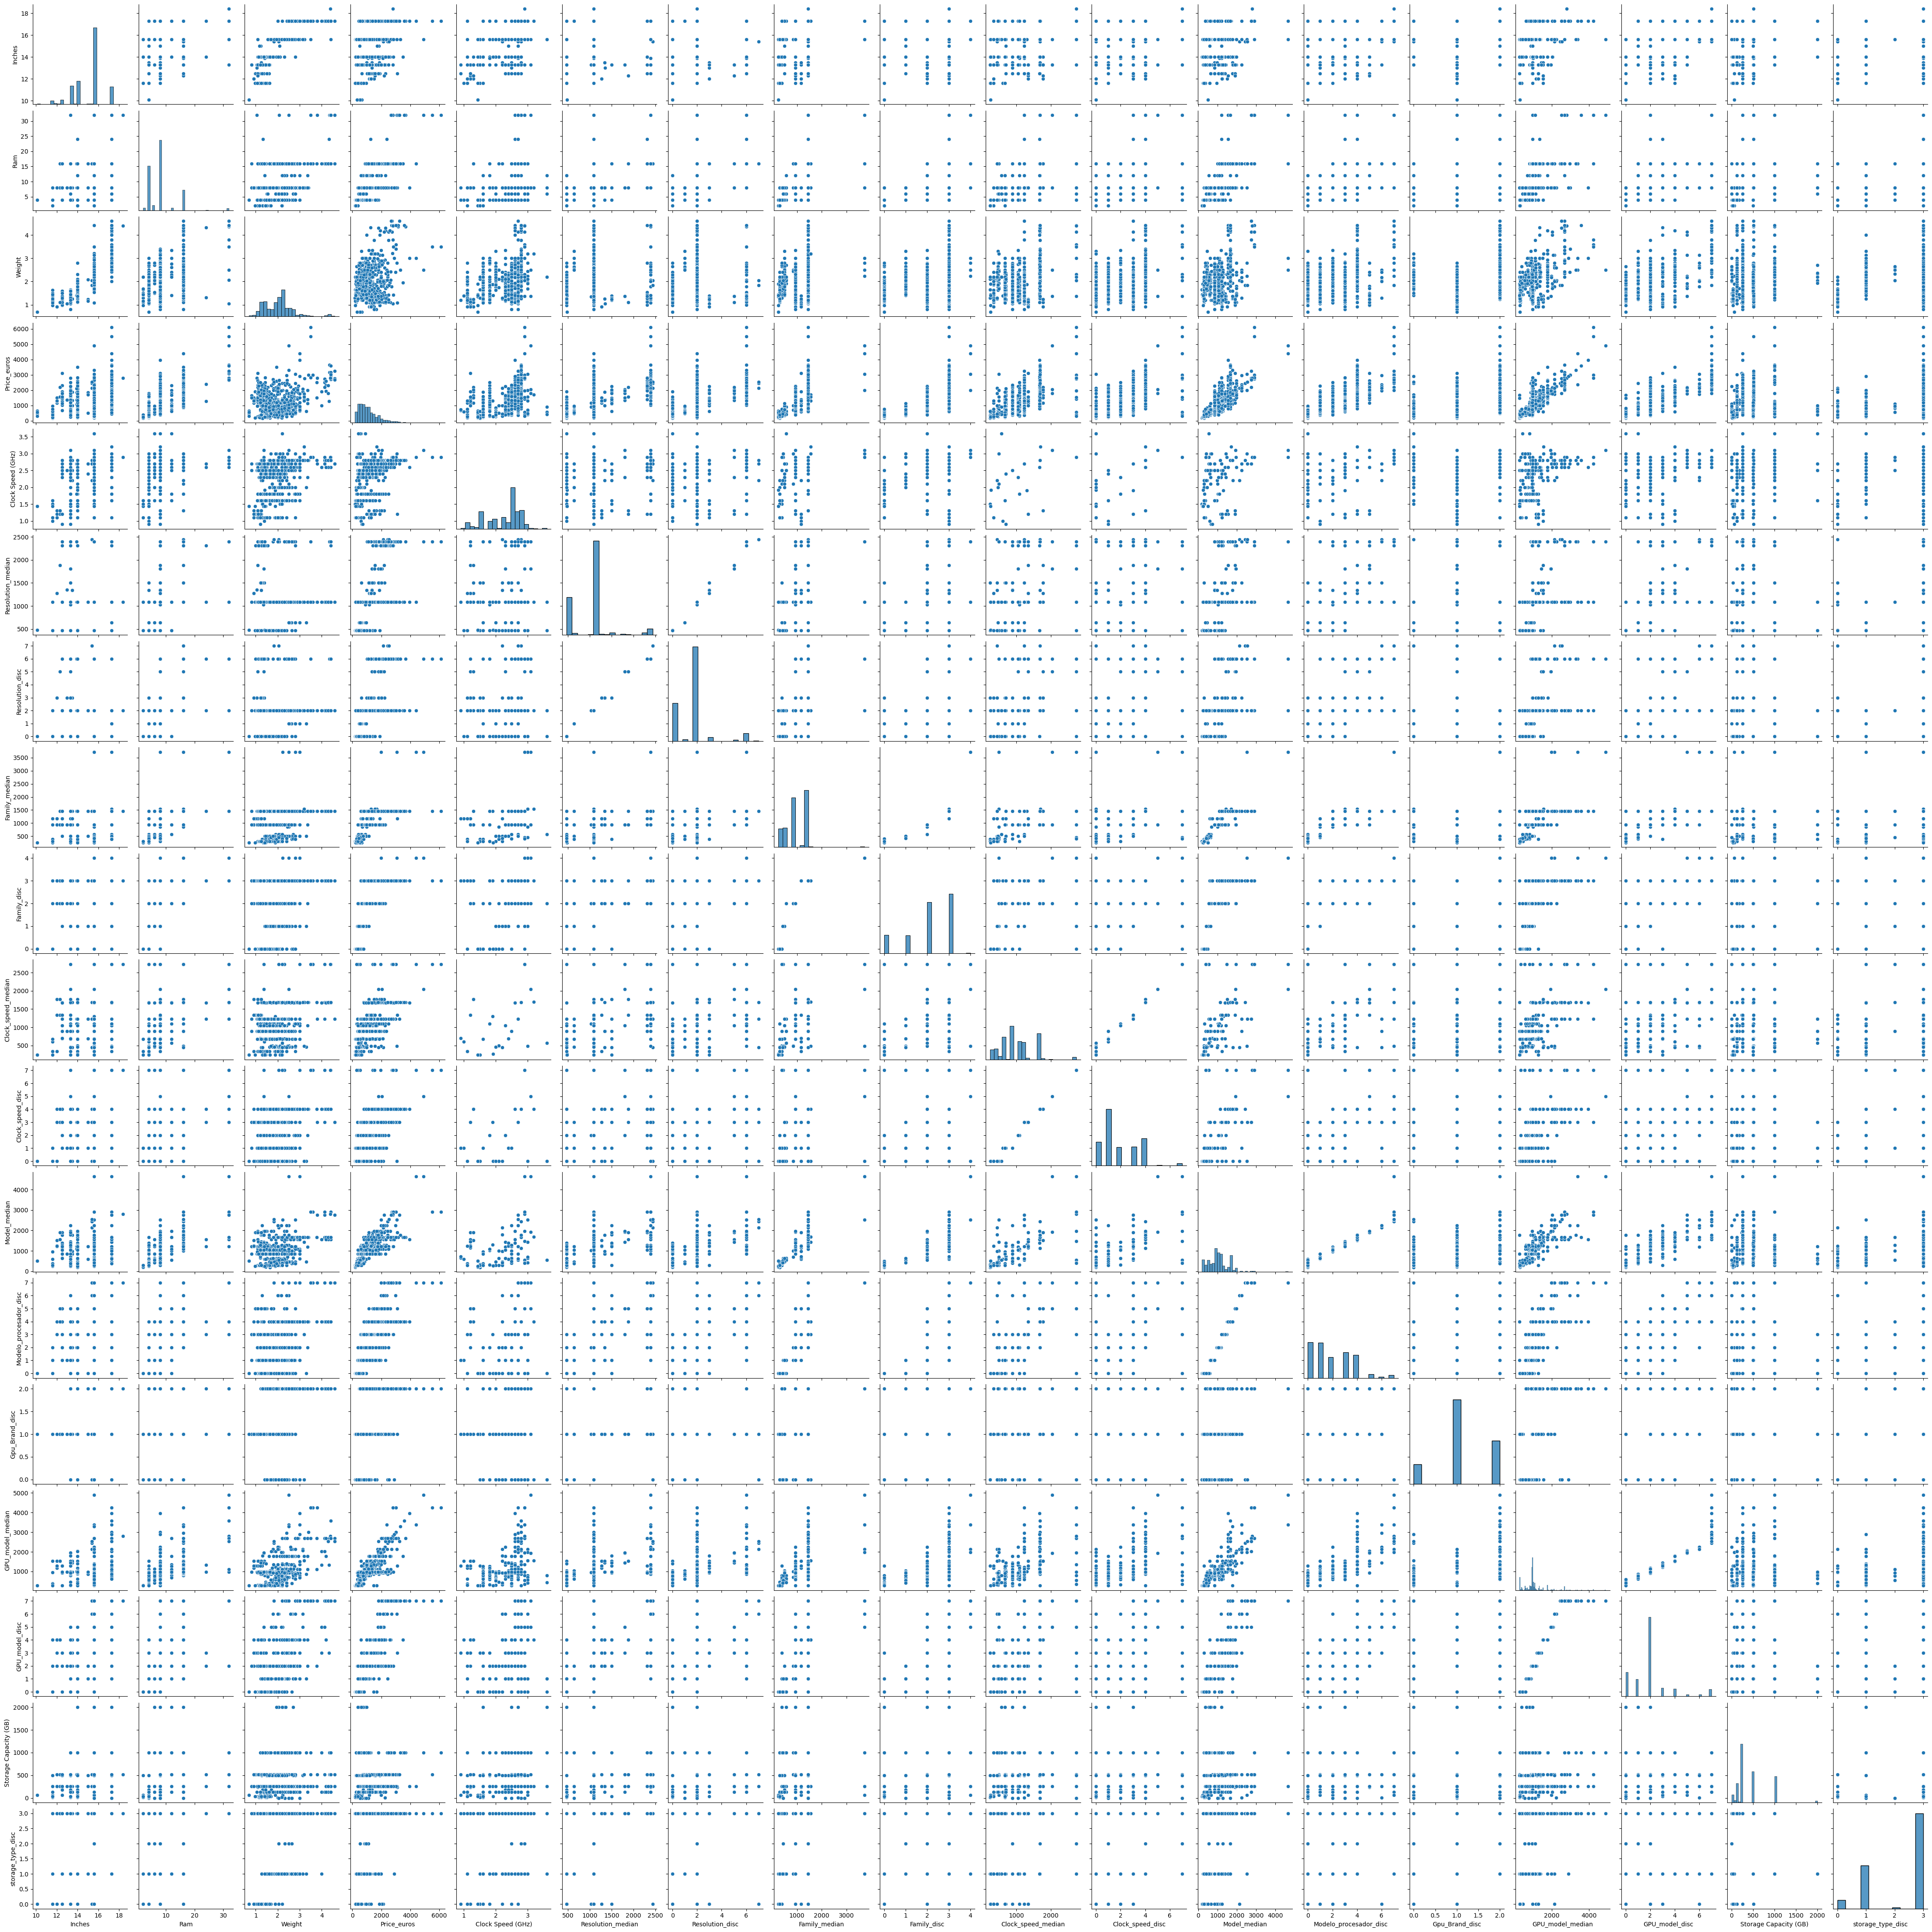

In [122]:
sns.pairplot(df_copy)

In [126]:
df_copy.groupby(['Ram','Clock_speed_disc','GPU_model_disc','storage_type_disc'])['Price_euros'].agg(['median','mean','count'])

median         mean  \
Ram Clock_speed_disc GPU_model_disc storage_type_disc                         
2   0                0              0                   210.80   223.140000   
                                    3                   186.50   186.500000   
    1                0              0                   229.00   239.125000   
                                    1                   379.00   379.000000   
4   0                0              0                   299.00   355.532941   
...                                                        ...          ...   
32  3                7              3                  2799.00  2900.666667   
    4                2              3                  2639.00  2639.000000   
                     7              3                  3147.37  3253.692000   
    5                7              3                  4899.00  4899.000000   
    7                7              3                  5499.00  4799.000000   

                                                       count  
Ram Clock_speed_disc GPU_model_disc storage_type_disc         
2   0                0              0                      5  
                                    3                      2  
    1                0              0                      8  
                                    1                      1  
4   0                0              0                     17  
...                                                      ...  
32  3                7              3                      3  
    4                2              3                      1  
                     7              3                      5  
    5                7              3                      1  
    7                7              3                      3  

[151 rows x 3 columns]

Parece que los números menores están al comienzo y los mayores al final. Es decir, que parece que cumple con lo que estaba buscando. Ahora bien, va a resultar mejor para el modelo?????

#### Selección de columnas (df_disc)

Voy a eliminar las columnas creadas de la mediana de los importes así como las columnas que son sustituidas por las columnas discretizadas así como columnas que han sido tratadas y por lo tanto la información está en otras.

In [161]:
df_copy[['Gpu_Brand_disc', 'GPU_model_median', 'GPU_model_disc', 'Storage Type',
       'Storage Capacity (GB)', 'storage_type_disc']]

,Gpu_Brand_disc,GPU_model_median,GPU_model_disc,Storage Type,Storage Capacity (GB),storage_type_disc
id,,,,,,
268,0,889.00,1,HDD,1000,1
347,1,380.00,0,HDD,1000,1
353,1,936.00,2,SSD,256,3
578,2,2681.00,7,SSD,256,3
42,1,936.00,2,SSD,256,3
...,...,...,...,...,...,...
89,1,289.00,0,Flash Storage,32,0
716,1,936.00,2,SSD,128,3
517,0,417.50,0,HDD,1000,1


In [176]:
columnas_eliminar_df_disc = ['ScreenResolution','Cpu','Memory','Gpu','Resolution','Pantalla','Brand',
'Family','Model','Clock Speed (GHz)','Gpu Brand','Gpu Model',
'Resolution_median','Family_median','Clock_speed_median','Model_median',
'GPU_model_median','Storage Type','Storage Capacity (GB)']

In [177]:
df_disc = df_copy.drop(columns=columnas_eliminar_df_disc)
df_disc.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Gpu Type,Resolution_disc,Family_disc,Clock_speed_disc,Modelo_procesador_disc,Gpu_Brand_disc,GPU_model_disc,storage_type_disc
id,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,8,Windows 10,2.36,749.00,Dedicated,0,3,3,3,0,1,1
347,Asus,Notebook,15.6,4,Windows 10,2.00,449.00,Unknown,0,0,0,0,1,0,1
353,Toshiba,Notebook,13.3,8,Windows 7,1.20,1460.00,Unknown,2,2,2,2,1,2,3
578,Dell,Gaming,15.6,16,Windows 10,4.42,2868.99,Dedicated,6,3,4,4,2,7,3
42,Dell,Ultrabook,12.5,8,Windows 7,1.26,1713.37,Unknown,2,2,1,3,1,2,3
867,Asus,2 in 1 Convertible,15.6,12,Windows 10,2.26,1099.00,Dedicated,2,3,3,3,2,2,3
1136,Asus,Notebook,15.6,4,Linux,2.00,415.00,Unknown,2,1,0,0,1,2,3
609,MSI,Gaming,15.6,8,Windows 10,2.40,1142.80,Dedicated,2,3,4,4,2,2,3


#### Seleccion columnas (df_copy)

In [171]:
df_copy.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Resolution',
       'Pantalla', 'Brand', 'Family', 'Model', 'Clock Speed (GHz)',
       'Gpu Brand', 'Gpu Model', 'Gpu Type', 'Resolution_median',
       'Resolution_disc', 'Family_median', 'Family_disc', 'Clock_speed_median',
       'Clock_speed_disc', 'Model_median', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_median', 'GPU_model_disc', 'Storage Type',
       'Storage Capacity (GB)', 'storage_type_disc'],
      dtype='object')

In [173]:
columnas_eliminar_df_copy = ['ScreenResolution', 'Cpu','Resolution_median',
       'Memory', 'Gpu',
       'Resolution_disc', 'Family_median', 'Family_disc', 'Clock_speed_median',
       'Clock_speed_disc', 'Model_median', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_median', 'GPU_model_disc',
       'Storage Capacity (GB)', 'storage_type_disc']

In [174]:
df_copy_final = df_copy.drop(columns=columnas_eliminar_df_copy)
df_copy_final.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type,Storage Type
id,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,8,Windows 10,2.36,749.00,1366x768,Full HD,Intel,Core i7,7500U,2.7,AMD,Radeon R7 M445,Dedicated,HDD
347,Asus,Notebook,15.6,4,Windows 10,2.00,449.00,1366x768,Full HD,Intel,Pentium,Quad,1.1,Intel,HD Graphics 505,Unknown,HDD
353,Toshiba,Notebook,13.3,8,Windows 7,1.20,1460.00,1920x1080,Full HD,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Unknown,SSD
578,Dell,Gaming,15.6,16,Windows 10,4.42,2868.99,3840x2160,4K Ultra HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1070,Dedicated,SSD
42,Dell,Ultrabook,12.5,8,Windows 7,1.26,1713.37,1920x1080,Full HD,Intel,Core i5,6300U,2.4,Intel,HD Graphics 520,Unknown,SSD
867,Asus,2 in 1 Convertible,15.6,12,Windows 10,2.26,1099.00,1920x1080,Full HD,Intel,Core i7,7500U,2.7,Nvidia,GeForce GT 940MX,Dedicated,SSD
1136,Asus,Notebook,15.6,4,Linux,2.00,415.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown,SSD
609,MSI,Gaming,15.6,8,Windows 10,2.40,1142.80,1920x1080,Full HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1050,Dedicated,SSD


## Variable target

Target = 'Price_euros'

<Axes: >

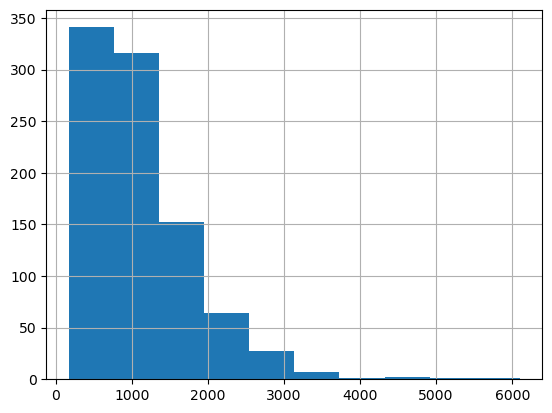

In [178]:
df_disc['Price_euros'].hist()

In [179]:
df_disc['Price_euros'].describe().round(2)

count     912.00
mean     1108.12
std       714.60
min       174.00
25%       589.00
50%       949.00
75%      1458.50
max      6099.00
Name: Price_euros, dtype: float64

In [180]:
df_disc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 912 non-null    object 
 1   TypeName                912 non-null    object 
 2   Inches                  912 non-null    float64
 3   Ram                     912 non-null    int32  
 4   OpSys                   912 non-null    object 
 5   Weight                  912 non-null    float64
 6   Price_euros             912 non-null    float64
 7   Gpu Type                912 non-null    object 
 8   Resolution_disc         912 non-null    int32  
 9   Family_disc             912 non-null    int32  
 10  Clock_speed_disc        912 non-null    int32  
 11  Modelo_procesador_disc  912 non-null    int32  
 12  Gpu_Brand_disc          912 non-null    int64  
 13  GPU_model_disc          912 non-null    int32  
 14  storage_type_disc       912 non-null    int6

## Exportación del df a un nuevo archivo

In [181]:
df_copy_final.to_csv('./data/df_precios_ordenadores.csv')
df_disc.to_csv('./data/df_final_precios_ordenadores.csv')